![Титаник](https://storage.googleapis.com/kaggle-datasets-images/826163/1798007/9b6d079a17519fa9fe81967fc2fd5ffa/dataset-cover.jpg?t=2021-01-21-15-06-41)

## Предобработка данных

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Считаем данные из csv файла в DataFrame **titanic**

In [3]:
titanic = pd.read_csv('train.csv')

Посмотрим первые 5 записей

In [4]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Можно заметить что у первых записей в столбце **Cabin** везде `NaN`. Стоит узнать есть ли еще иные записи в данном столбце.
Перед этим узнаем общую информацию о датасете.

In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Можно сделать вывод, что не хватает данных в **Age**, **Fare**.

Делаем вывод, что *describe()* работает только с числовыми столбцами в общем виде. А если *describe()* применить отдельно к столбцу?

In [6]:
titanic.Cabin.describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

Так мы узнали что *describe()* работает и со строковыми полями. А в столбце **Cabin** 147 уникальных значений из 204.

In [7]:
titanic.groupby('Name').size()

Name
Abbing, Mr. Anthony                      1
Abbott, Mr. Rossmore Edward              1
Abbott, Mrs. Stanton (Rosa Hunt)         1
Abelson, Mr. Samuel                      1
Abelson, Mrs. Samuel (Hannah Wizosky)    1
                                        ..
de Mulder, Mr. Theodore                  1
de Pelsmaeker, Mr. Alfons                1
del Carlo, Mr. Sebastiano                1
van Billiard, Mr. Austin Blyler          1
van Melkebeke, Mr. Philemon              1
Length: 891, dtype: int64

In [8]:
titanic.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

Таким образом можно узнать количество повторяющихся значений в столбце.

Узнаем количество данных которых не хватает по столбцам

In [9]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Пропуски есть в стрех столбцах: **Age**, **Fare**, **Cabin**. Больше всего пропушено данных в **Cabin**.
В **Cabin** очень много пропуско ~ 78% смысла от такого столбца нет, его удаляем.
Единственный пропущенный **Fare** заменить на среднее по столбцу.

In [10]:
titanic.duplicated().sum()

0

Дубликатов нет

### Удаляем столбец Cabin и заполняем пропуски в Age и Fare

In [11]:
titanic.drop(columns='Cabin', inplace=True)

In [12]:
titanic.Fare.fillna(titanic.Fare.median(), inplace=True)

In [13]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [14]:
titanic.corr(numeric_only=True)['Age'].abs()

PassengerId    0.036847
Survived       0.077221
Pclass         0.369226
Age            1.000000
SibSp          0.308247
Parch          0.189119
Fare           0.096067
Name: Age, dtype: float64

Можно увидеть высокую корреляцию с **Pclass**

In [15]:
df_Age_mean=titanic.groupby(['Sex', 'Pclass']).median(numeric_only=True)['Age']
df_Age_mean

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [16]:
titanic['Age'] = titanic['Age'].fillna(
    titanic.groupby(['Pclass', 'Sex'])['Age'].transform('median')
)

In [17]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [18]:
titanic.Embarked.fillna(method="ffill", inplace=True)

In [19]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Базовая статистика по ключевым признакам (EDA)

In [21]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [22]:
titanic.Age = titanic.Age.astype('int64')

In [23]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
660,661,1,1,"Frauenthal, Dr. Henry William",male,50,2,0,PC 17611,133.6500,S
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,25,0,0,367228,7.7500,Q
488,489,0,3,"Somerton, Mr. Francis William",male,30,0,0,A.5. 18509,8.0500,S
568,569,0,3,"Doharr, Mr. Tannous",male,25,0,0,2686,7.2292,C
371,372,0,3,"Wiklund, Mr. Jakob Alfred",male,18,1,0,3101267,6.4958,S


In [24]:
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Получается что умерло 549 человек и выжило 342. Погибло больше чем выжило

<AxesSubplot: >

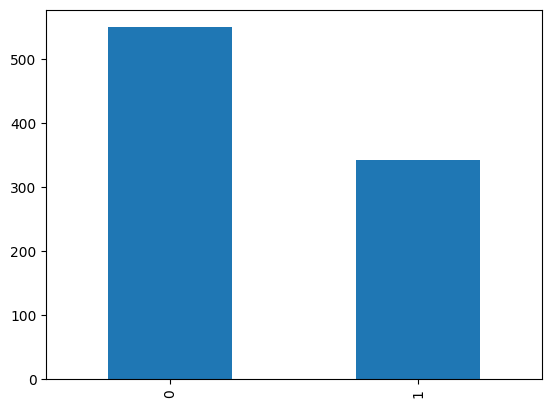

In [25]:
titanic.Survived.value_counts().plot(kind='bar')

In [26]:
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot: >

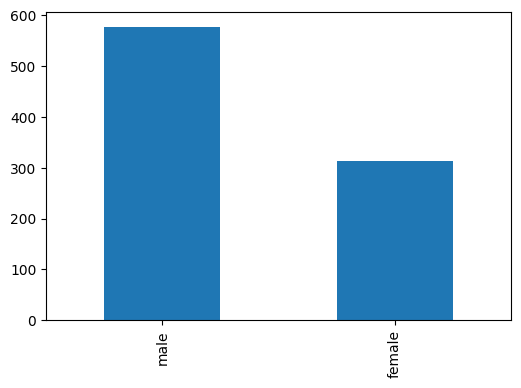

In [27]:
titanic.Sex.value_counts().plot(kind='bar', figsize=(6,4))

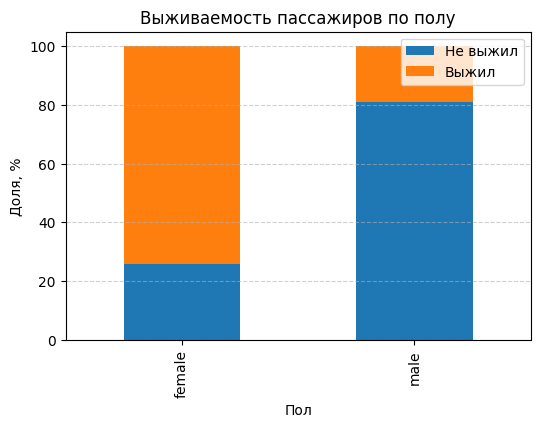

In [28]:
survival_by_sex = titanic.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)

# Преобразуем в проценты
survival_by_sex = survival_by_sex.div(survival_by_sex.sum(axis=1), axis=0) * 100

# Строим график
survival_by_sex.plot(kind='bar', stacked=True, figsize=(6,4))
plt.title('Выживаемость пассажиров по полу')
plt.ylabel('Доля, %')
plt.xlabel('Пол')
plt.legend(['Не выжил','Выжил'])

plt.grid(linestyle='--', axis='y', alpha=0.6)
plt.show()

In [29]:
titanic.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

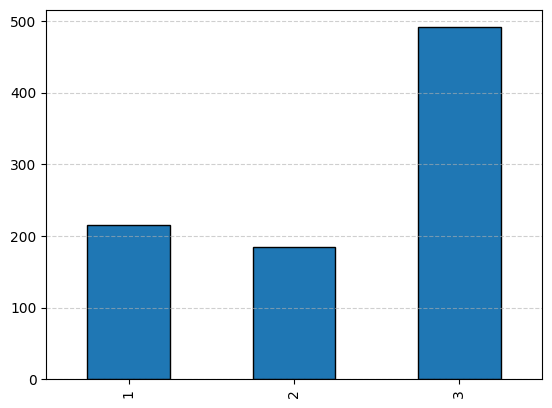

In [30]:
titanic.Pclass.value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.grid(linestyle='--', axis='y', alpha=0.6)

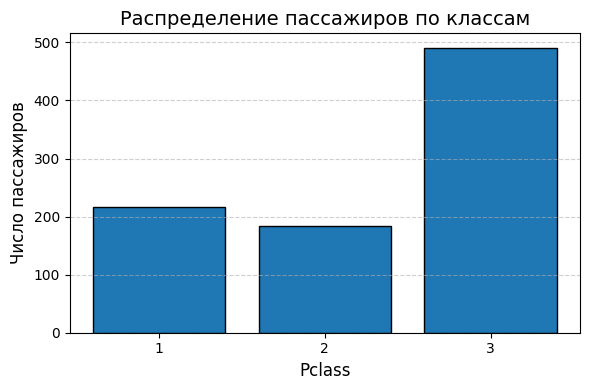

In [31]:
counts = titanic.Pclass.value_counts().sort_index()

fig, ax = plt.subplots(figsize=(6,4))
bars = ax.bar(counts.index.astype(str), counts.values, edgecolor='black')

# Заголовок и подписи осей
ax.set_title('Распределение пассажиров по классам', fontsize=14)
ax.set_xlabel('Pclass', fontsize=12)
ax.set_ylabel('Число пассажиров', fontsize=12)

# Включить сетку по горизонтали и убрать рамки
ax.yaxis.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [32]:
print('Средний возраст равен', titanic.Age.mean().round(2))
print('Медианный возраст равен',titanic.Age.median().round(2))

Средний возраст равен 29.07
Медианный возраст равен 26.0


Есть более пожилые пассажиры которые тянут средний возраст вверх.

In [33]:
print('Средняя стоимость билета равна', titanic.Fare.mean().round(2))
print('Медианная стоимость билета равна',titanic.Fare.median().round(2))

Средняя стоимость билета равна 32.2
Медианная стоимость билета равна 14.45


Тут разница огромная. Это значит, что были очень дорогие билеты (богатые пассажиры 1 класса), которые подняли среднее в 2,5 раза.  
Вывод: для распределений с сильными выбросами лучше использовать медиану, а не среднее.

In [34]:
titanic.groupby('Pclass')['Survived'].value_counts(normalize=True)

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64

Столбчатая диаграмма доли выживших и невыживших по классам:

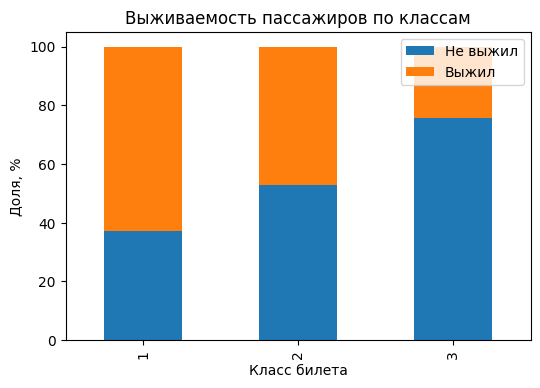

In [35]:
# Доля выживших и невыживших по классам
survival_by_class = titanic.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)

# Преобразуем в проценты
survival_by_class = survival_by_class.div(survival_by_class.sum(axis=1), axis=0) * 100

# Строим график
survival_by_class.plot(kind='bar', stacked=True, figsize=(6,4))
plt.title('Выживаемость пассажиров по классам')
plt.ylabel('Доля, %')
plt.xlabel('Класс билета')
plt.legend(['Не выжил','Выжил'])
plt.show()

Круговые диаграммы доли выживших и невыживших по классам:

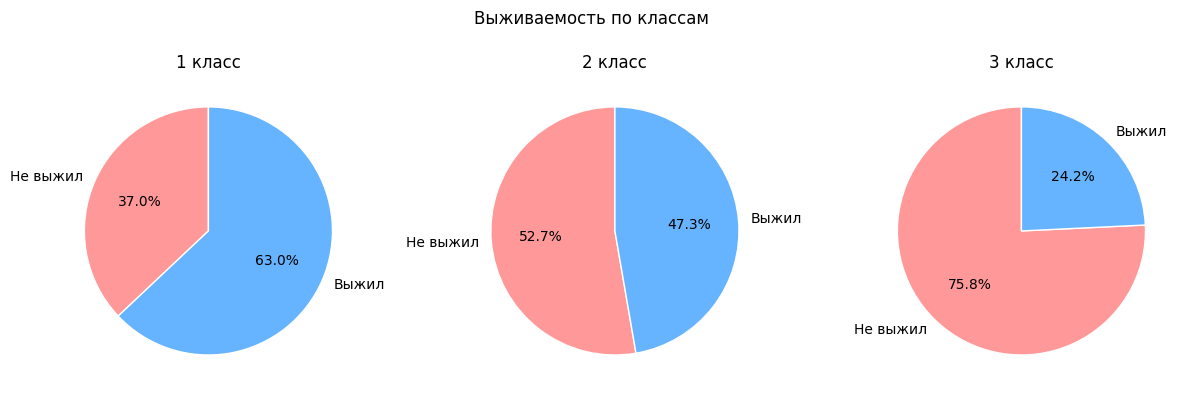

In [36]:
labels = ['Не выжил', 'Выжил']
colors = ['#ff9999','#66b3ff']

fig, axes = plt.subplots(1, 3, figsize=(12,4))

for i, p in enumerate([1,2,3]):
    vals = titanic[titanic.Pclass==p]['Survived'].value_counts(normalize=True).reindex([0,1], fill_value=0)
    axes[i].pie(vals, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor':'white'})
    axes[i].set_title(f'{p} класс')

plt.suptitle('Выживаемость по классам')
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

Выживаемость пассажиров из 1 класса составила 63%, что значительно больше чем у пассажиров из других классов. Пассажиры 3 класса имели наименьший процент выживаемости, который составил 24.2%.

---

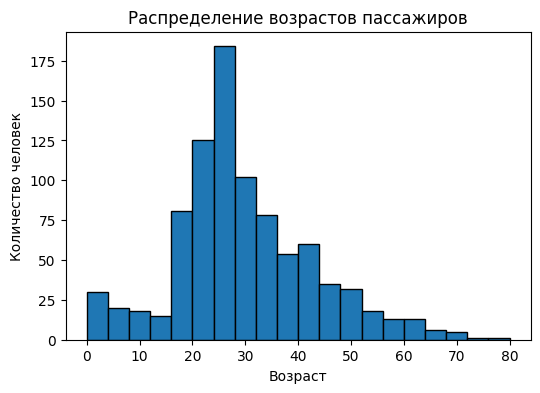

In [37]:
plt.figure(figsize=(6,4))
plt.hist(titanic['Age'], bins=20, edgecolor='black')
plt.title('Распределение возрастов пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество человек')
plt.show()

Можно заменить, что много младенцев. Больше чем детей постарше.
Больше всего людей в возрасте примерно 25 лет.


<Figure size 600x400 with 0 Axes>

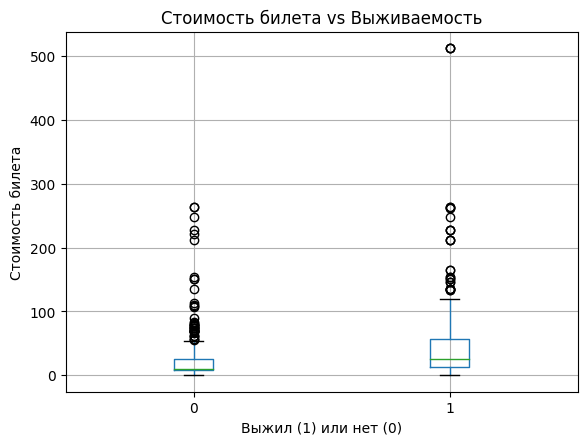

In [38]:
plt.figure(figsize=(6,4))
titanic.boxplot(column='Fare', by='Survived')
plt.title('Стоимость билета vs Выживаемость')
plt.suptitle('')
plt.xlabel('Выжил (1) или нет (0)')
plt.ylabel('Стоимость билета')
plt.show()

In [39]:
titanic.Age.max()

80

In [40]:
bins = [0, 12, 18, 35, 50, 85]
labels = ['Дети', 'Подростки', 'Молодежь', 'Взрослые', 'Пожилые']
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=bins, labels=labels, right=False)

In [41]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,Молодежь
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,Взрослые
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,Молодежь
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,Взрослые
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,Взрослые


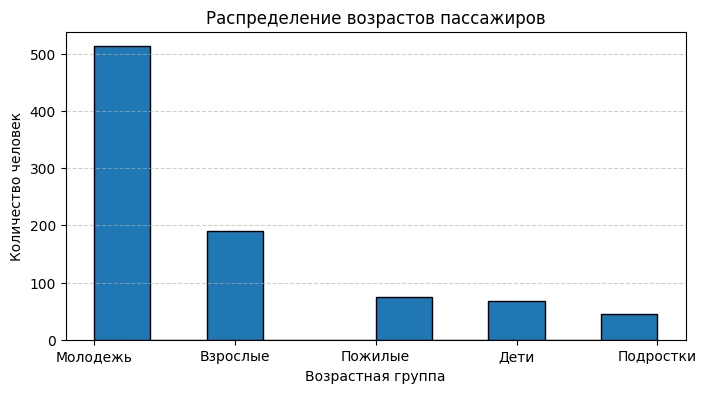

In [42]:
plt.figure(figsize=(8,4))
plt.hist(titanic['AgeGroup'], edgecolor='black')
plt.title('Распределение возрастов пассажиров')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество человек')
plt.grid(linestyle='--', axis='y', alpha=0.6)
plt.show()

In [43]:
age_survival = titanic.groupby(['AgeGroup', 'Survived']).size().unstack(fill_value=0)

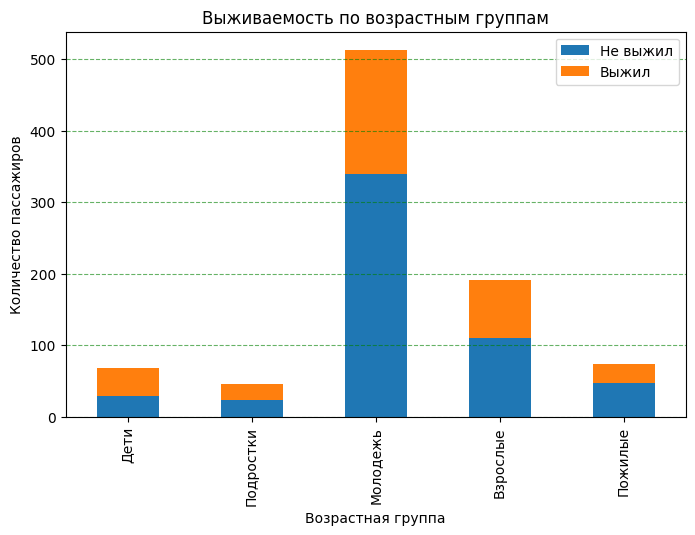

In [44]:
age_survival.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Выживаемость по возрастным группам")
plt.xlabel("Возрастная группа")
plt.ylabel("Количество пассажиров")
plt.legend(["Не выжил", "Выжил"])
plt.grid(linestyle='--', axis='y', alpha=0.6, color='green')
plt.show()

Большинство во всех возрастных категориях не выжило.

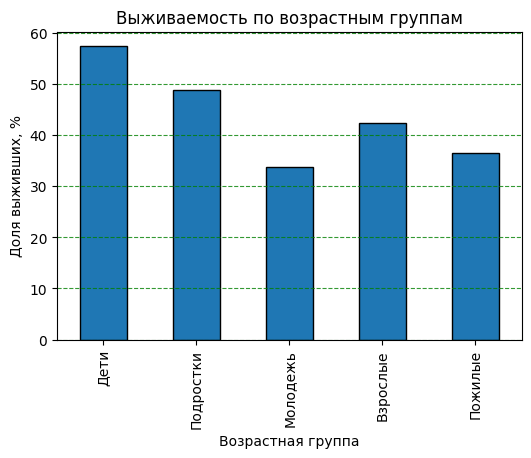

In [130]:
survival_rate = titanic.groupby('AgeGroup')['Survived'].mean() * 100
survival_rate.plot(kind='bar', figsize=(6,4), edgecolor='black', )
plt.title("Выживаемость по возрастным группам")
plt.xlabel("Возрастная группа")
plt.ylabel("Доля выживших, %")
plt.grid(linestyle='--', axis='y', alpha=0.8, color='green')
plt.show()

В каждой категории, кроме детей, выжило меньше 50%. У молодежи выживаемость оказалась самой низкой —менее 35%. Лучше всего у детей и подростков, при этом их гораздо меньше было на корабле чем молодежи. Очевидно что и спасали детей и подросктов в первую очередь.  
Следственно социальный фактор был одним из основных принципов выживания.

In [46]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,Молодежь
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,Взрослые
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,Молодежь


### Следующая задача это проверить влияние семейных связей на выживаемость

In [47]:
titanic['Family_size'] = titanic.SibSp + titanic.Parch + 1

In [48]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,Молодежь,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,Взрослые,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,Молодежь,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,Взрослые,2
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,Взрослые,1


In [49]:
family_size_counts = titanic['Family_size'].value_counts()

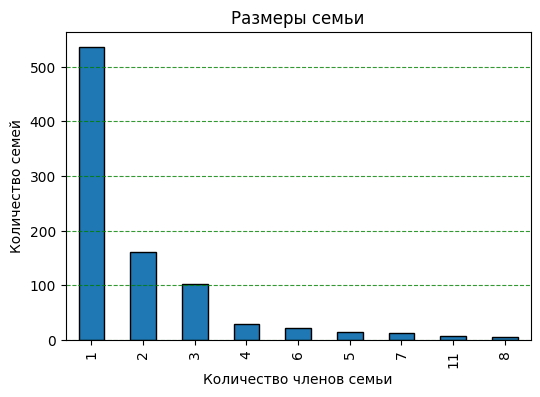

In [50]:
family_size_counts.plot(kind='bar', figsize=(6,4), edgecolor='black', )
plt.title("Размеры семьи")
plt.xlabel("Количество членов семьи")
plt.ylabel("Количество семей")
plt.grid(linestyle='--', axis='y', alpha=0.8, color='green')
plt.show()

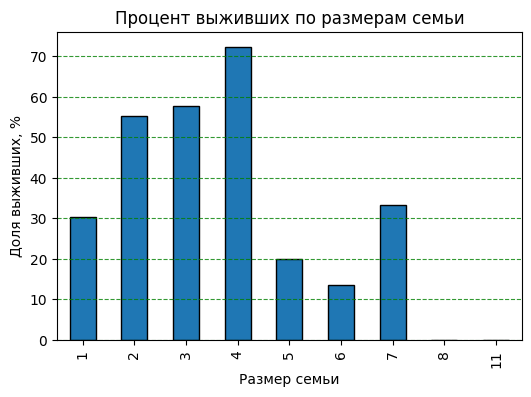

In [123]:
survival_family_size = titanic.groupby('Family_size')['Survived'].mean() * 100
survival_family_size.plot(kind='bar', figsize=(6,4), edgecolor='black', )
plt.title("Процент выживших по размерам семьи")
plt.xlabel("Размер семьи")
plt.ylabel("Доля выживших, %")
plt.grid(linestyle='--', axis='y', alpha=0.8, color='green')
plt.show()

Выше всего выживаемость у семей состоящих из 4 человек около 70%

Выделим семьи в три категории: одиночки, малые(от 2 до 4 человек), большие(от 5 человек и более)

In [52]:
bins = [1, 2, 5, 12]
labels = ['Одиночки', 'Малые', 'Большие']
titanic['Family_size_group'] = pd.cut(titanic['Family_size'], bins=bins, labels=labels, right=False)

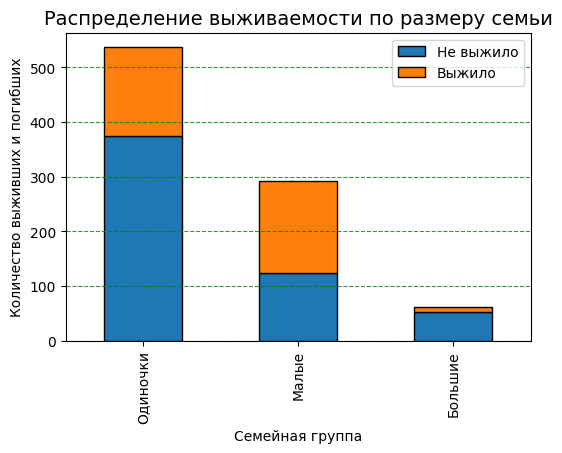

In [53]:
survival_family_size_group = titanic.groupby(['Family_size_group','Survived']).size().unstack(fill_value=0)

survival_family_size_group.plot(kind='bar', stacked=True, figsize=(6,4), edgecolor='black', )
plt.title("Распределение выживаемости по размеру семьи", fontsize=14)
plt.xlabel("Семейная группа")
plt.ylabel("Количество выживших и погибших")
plt.legend(["Не выжило", "Выжило"])
plt.grid(linestyle='--', axis='y', alpha=0.8, color='green')
plt.show()

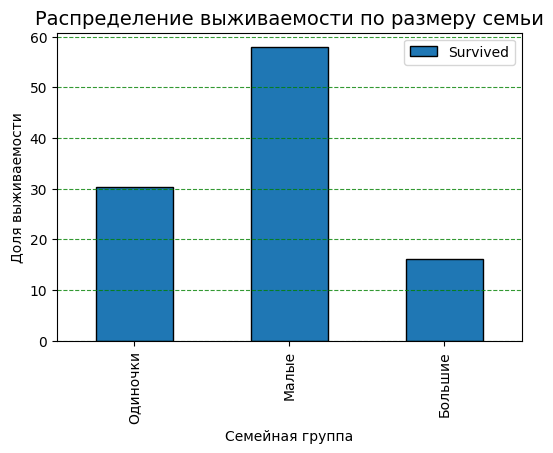

In [54]:
survival_family_size_group = titanic.groupby('Family_size_group')['Survived'].mean() * 100

survival_family_size_group.plot(kind='bar', figsize=(6,4), edgecolor='black', )
plt.title("Распределение выживаемости по размеру семьи", fontsize=14)
plt.xlabel("Семейная группа")
plt.ylabel("Доля выживаемости")
plt.legend()
plt.grid(linestyle='--', axis='y', alpha=0.8, color='green')
plt.show()

Выживаемость малой семейной группы выше всех и составляет 57%. Меньше всего выживали большие семьи, лишь около 15% процентов из них выжило

C:\Users\mama\AppData\Local\Temp\ipykernel_2092\2978262894.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  survival_family_size_group = survival_family_size_group.groupby(level=0).apply(lambda x: x / x.sum() * 100)


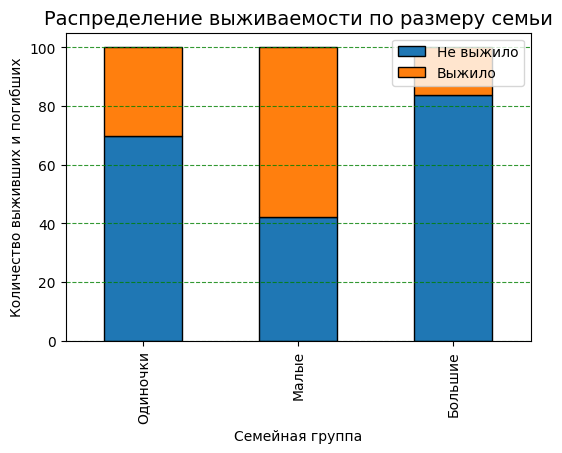

In [55]:
survival_family_size_group = titanic.groupby(['Family_size_group','Survived']).size()
survival_family_size_group = survival_family_size_group.groupby(level=0).apply(lambda x: x / x.sum() * 100)
survival_family_size_group.unstack().plot(kind='bar', stacked=True, figsize=(6,4), edgecolor='black', )
plt.title("Распределение выживаемости по размеру семьи", fontsize=14)
plt.xlabel("Семейная группа")
plt.ylabel("Количество выживших и погибших")
plt.legend(["Не выжило", "Выжило"])
plt.grid(linestyle='--', axis='y', alpha=0.8, color='green')
plt.show()

In [56]:
survival_pclass_sex = titanic.groupby(['Pclass', 'Sex'])['Survived'].mean() * 100
print(survival_pclass_sex)

Pclass  Sex   
1       female    96.808511
        male      36.885246
2       female    92.105263
        male      15.740741
3       female    50.000000
        male      13.544669
Name: Survived, dtype: float64


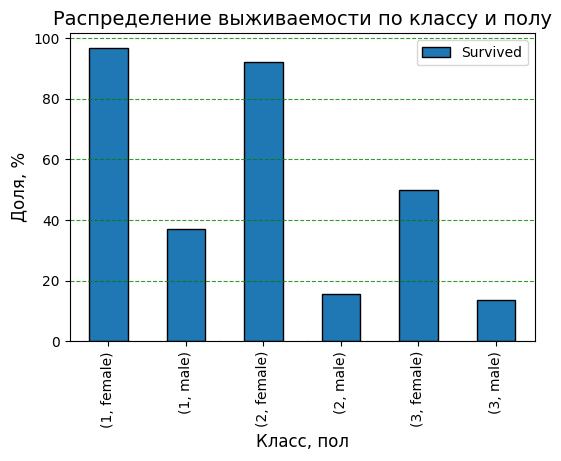

In [57]:
survival_pclass_sex.plot(kind='bar', figsize=(6,4), edgecolor='black', )
plt.title("Распределение выживаемости по классу и полу", fontsize=14)
plt.xlabel("Класс, пол", fontsize=12)
plt.ylabel("Доля, %", fontsize=12)
plt.legend()
plt.grid(linestyle='--', axis='y', alpha=0.8, color='green')
plt.show()

Выживаемость у женщин 1 и 2 класса очень высокая. У мужчин из 2 или 3 класса очень низкая, у них практически не было шансов.

In [58]:
titanic.corr(numeric_only =True)['Fare']

PassengerId    0.012658
Survived       0.257307
Pclass        -0.549500
Age            0.123250
SibSp          0.159651
Parch          0.216225
Fare           1.000000
Family_size    0.217138
Name: Fare, dtype: float64

Высокая корреляция стоимости билета и класса, причем отрицательная. Все логично чем больше стоимость билета тем выше класс, но по факту класс уменьшается.

In [59]:
pd.pivot_table(titanic,
               index='Pclass',
               values='Fare',
               aggfunc=['median', 'min', 'max', 'count'])

,median,min,max,count
,Fare,Fare,Fare,Fare
Pclass,,,,
1,60.2875,0.0,512.3292,216
2,14.2500,0.0,73.5000,184
3,8.0500,0.0,69.5500,491


In [60]:
titanic['GroupFare'] = pd.qcut(titanic['Fare'], q=3, labels=['Низкий', 'Средний', 'Высокий'])

In [61]:
survival_fare = titanic.groupby('GroupFare')['Survived'].mean() * 100
print(survival_fare)

GroupFare
Низкий     19.805195
Средний    40.277778
Высокий    55.932203
Name: Survived, dtype: float64


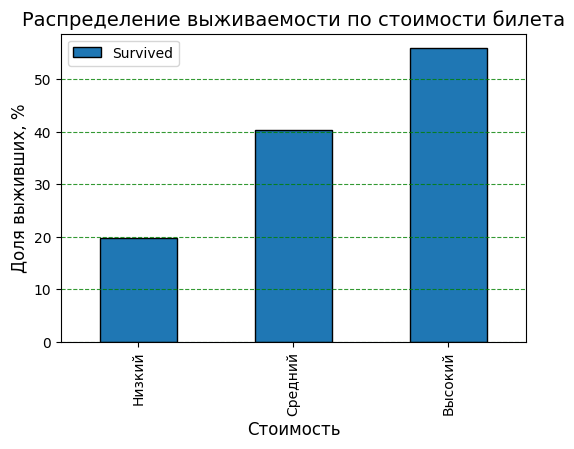

In [109]:
survival_fare.plot(kind='bar', figsize=(6,4), edgecolor='black', )
plt.title("Распределение выживаемости по стоимости билета", fontsize=14)
plt.xlabel("Стоимость", fontsize=12)
plt.ylabel("Доля выживших, %", fontsize=12)
plt.legend()
plt.grid(linestyle='--', axis='y', alpha=0.8, color='green')
plt.show()

Выживаемость в группе с дорогими билетами составила 55%, в то время как с дешёвыми — 20%. У пассажиров с низкой стоимостью билета был невысокий шанс выжить.
Богатые имели больше возможности выжить, но дорогой билет не был гарантией выживаемости, так как лишь чуть больше половины из них выжили.

### Влиял ли порт посадки (Embarked) на шансы выживания?

In [68]:
titanic.Embarked.describe()

count     891
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [84]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   PassengerId        891 non-null    int64   
 1   Survived           891 non-null    int64   
 2   Pclass             891 non-null    int64   
 3   Name               891 non-null    object  
 4   Sex                891 non-null    object  
 5   Age                891 non-null    int64   
 6   SibSp              891 non-null    int64   
 7   Parch              891 non-null    int64   
 8   Ticket             891 non-null    object  
 9   Fare               891 non-null    float64 
 10  Embarked           891 non-null    object  
 11  AgeGroup           891 non-null    category
 12  Family_size        891 non-null    int64   
 13  Family_size_group  891 non-null    category
 14  GroupFare          891 non-null    category
dtypes: category(3), float64(1), int64(7), object(4)
memory us

In [111]:
survived_by_emb = titanic.groupby(['Embarked'])['Survived'].mean() * 100

S (Southampton) - базовый порт отправления.  
С (Cherbourg) - техническая остановка, куда «Титаник» прибыл в тот же день, чтобы принять пассажиров первого класса преимущественно американцев.  
Q (Queenstown) - последняя остановка перед пересечением Атлантики, где на борт поднялись преимущественно пассажиры третьего класса, а также пассажиры второго класса.

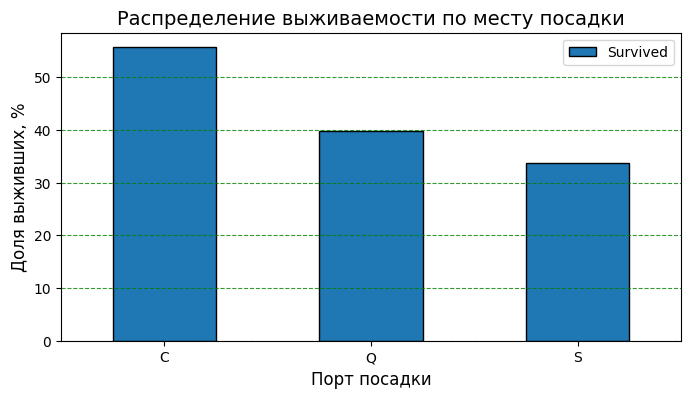

In [112]:
survived_by_emb.plot(kind='bar', rot=0, figsize=(8,4), edgecolor='black')
plt.title("Распределение выживаемости по месту посадки", fontsize=14)
plt.xlabel("Порт посадки", fontsize=12)
plt.ylabel("Доля выживших, %", fontsize=12)
plt.legend()
plt.grid(linestyle='--', axis='y', alpha=0.8, color='green')
plt.show()

Выживаемость выше у пассажиров из порта C, ведь там садились пассажиры первого класса, меньше всего из порта S, где садились в основном пассажиры 3 класса.

In [119]:
survived_by_emb_and_pclass = titanic.groupby(['Embarked', 'GroupFare'])['Survived'].mean() * 100

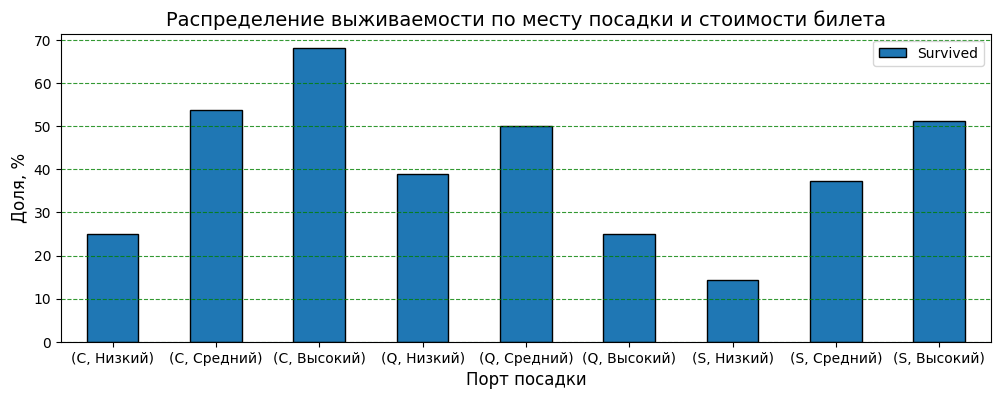

In [120]:
survived_by_emb_and_pclass.plot(kind='bar', rot=0, figsize=(12,4), edgecolor='black')
plt.title("Распределение выживаемости по месту посадки и стоимости билета", fontsize=14)
plt.xlabel("Порт посадки", fontsize=12)
plt.ylabel("Доля, %", fontsize=12)
plt.legend()
plt.grid(linestyle='--', axis='y', alpha=0.8, color='green')
plt.show()

Те, кто заплатили высокую стоимость и сели в порту Q меньше выживали, чем те кто заплатил меньше и сел в том же порту. При этом выживаемость пассажиров из других портов закономерна, чем выше стоимость билета, тем выше выживаемость.

## Заключение

Выживаемость пассажиров «Титаника» определялась сочетанием социальных факторов (пол, возраст, состав семьи), экономического положения (класс и стоимость билета) и места посадки. Главным выводом является то, что женщины, дети и пассажиры высших классов имели наибольшие шансы на спасение, в то время как мужчины из 3-го класса и одиночки оказались наиболее уязвимыми.

Таким образом, проведённый анализ позволил наглядно показать социальные и экономические закономерности, определявшие судьбы людей во время катастрофы.